Scraping Challenge
Do a little scraping or API-calling of your own. Pick a new website and see what you can get out of it. Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)
2) Iterate over multiple pages/queries
3) Save the data to your computer

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest. Write up a report from scraping code to summary and share it with your mentor.

In [1]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess
from google.colab import files


class CLSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "CL"
    
    # URL(s) to start with.
    allowed_domains = ["delaware.craigslist.org"]
    start_urls = [
        'https://delaware.craigslist.org/d/apts-housing-for-rent/search/apa',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//p'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                #//a[has-class("productDescLink")]/text()
                'title': posting.xpath('a[@class="result-title hdrlnk"]/text()').extract_first(),
                'date': posting.xpath('time[@class="result-date"]/text()').extract_first(),
                'price': posting.xpath('span/span[@class="result-price"]/text()').extract_first()
            }
        
        # scrape all pages
        next_page_relative_url = response.xpath('//span[@class="buttons"]/a/@href').extract_first()
        next_page_absolute_url = response.urljoin(next_page_relative_url)
        

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'craigsde.json',  # Name our storage file.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcampCrawler (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(CLSpider)
process.start()
files.download('craigsde.json')
print('Success!')


Success!


In [2]:
import pandas as pd

# Turning JSON into Data Frame
craigs = pd.read_json('craigsde.json')
print(craigs.shape)
craigs.head()

(120, 3)


,date,price,title
0,Mar 31,$965,"2 Bed 1.5 Bath - On-site Management, On-site m..."
1,Mar 31,$1235,"Live/Work apartments available, Open kitchens ..."
2,Mar 31,$1200,House for rent - FWB
3,Mar 31,$2156,"Riverfront Parks and Walkways, Dry-Cleaning Se..."
4,Mar 31,$585,Fully Renovated !! 3bed/3bath new carpet and e...


In [3]:
import re

craigs.price = craigs.price.map(lambda x: None if x == None else int(re.sub('\$', '', str(x))))
craigs.head()


,date,price,title
0,Mar 31,965,"2 Bed 1.5 Bath - On-site Management, On-site m..."
1,Mar 31,1235,"Live/Work apartments available, Open kitchens ..."
2,Mar 31,1200,House for rent - FWB
3,Mar 31,2156,"Riverfront Parks and Walkways, Dry-Cleaning Se..."
4,Mar 31,585,Fully Renovated !! 3bed/3bath new carpet and e...


In [4]:
de_price = craigs[craigs.price>0]
average_price = de_price.price.mean()

print(average_price)

1290.3


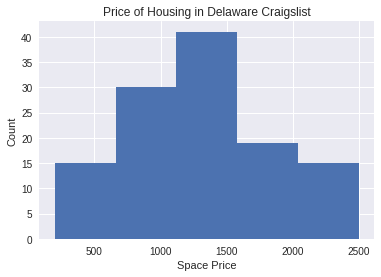

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(de_price.price, bins=5)
plt.xlabel('Space Price')
plt.ylabel('Count')
plt.title('Price of Housing in Delaware Craigslist')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


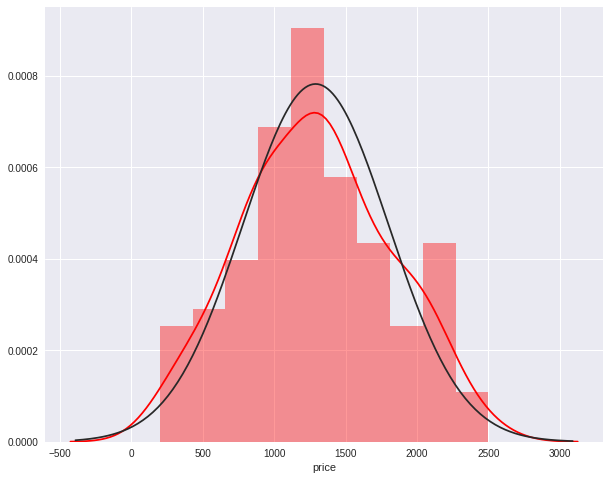

In [7]:
import scipy.stats as stats
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.distplot(de_price.price, bins = 10, fit = stats.norm,color='r');

I was not able to get the data from all pages which would be too much. We can see that the average price of a rental house is around $1300 in Delaware on Craigslist.